In [1]:
import sklearn.datasets as ds
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


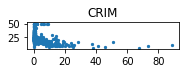

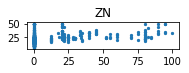

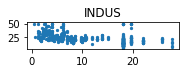

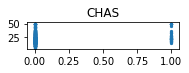

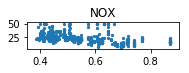

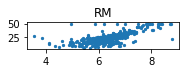

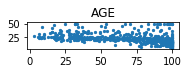

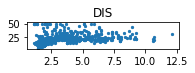

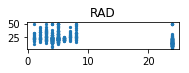

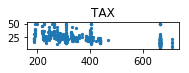

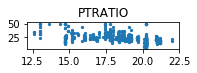

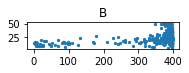

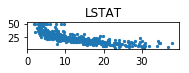

In [3]:
"""boston house data"""
boston_data = ds.load_boston()
x_data = boston_data.data
y_data = boston_data.target
name_data = boston_data.feature_names
#print(boston_data)
print(x_data.shape)
print(y_data.shape)
print(name_data)

for i in range(len(x_data[0])):
    plt.subplot(7,2,i+1)
    plt.scatter(x_data[:,i], y_data, s =5)
    plt.title(name_data[i])
    plt.show()

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=125)

Linear Regression


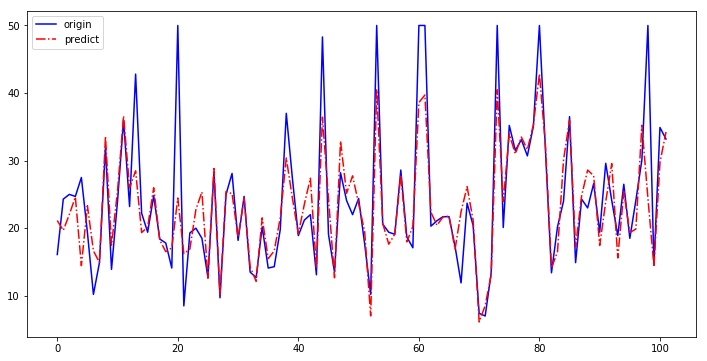

mean_absolute_error:  3.377642697362839
mean_squared_error:  31.15059667690508
median_absolute_error:  1.777421315736012
explained_variance_score:  0.7105949626282899
r2_score:  0.7068954225782405


In [17]:

"""Linear Regression"""
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

clf = linear_model.LinearRegression()

clf.fit(X_train, Y_train)

print("Linear Regression")
lr_y_predict = clf.predict(X_test)

#compare true_test with predict_test

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), lr_y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, lr_y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, lr_y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, lr_y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, lr_y_predict))
print('r2_score: ', r2_score(Y_test, lr_y_predict))

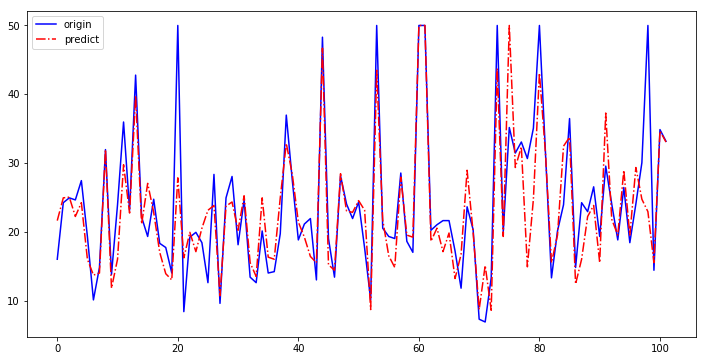

mean_absolute_error:  3.564705882352942
mean_squared_error:  30.627843137254906
median_absolute_error:  2.200000000000001
explained_variance_score:  0.7176602786686926
r2_score:  0.7118141551766595


In [16]:
"""CART"""
from sklearn import tree

clf = tree.DecisionTreeRegressor()

clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))

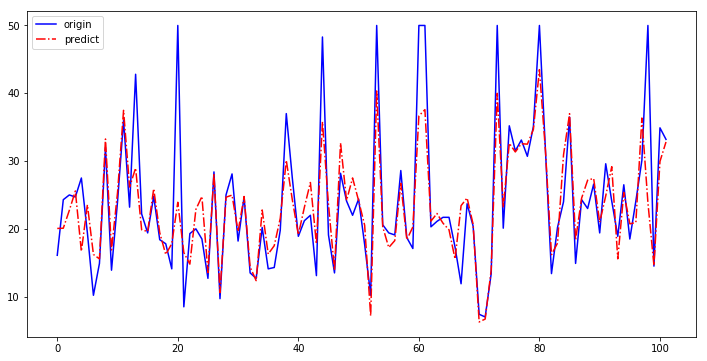

mean_absolute_error:  3.5141846261708007
mean_squared_error:  32.546528103964036
median_absolute_error:  2.207889493775851
explained_variance_score:  0.6969189023023419
r2_score:  0.6937607177993361


In [18]:
"""Bayes"""
from sklearn import linear_model

clf = linear_model.BayesianRidge()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))


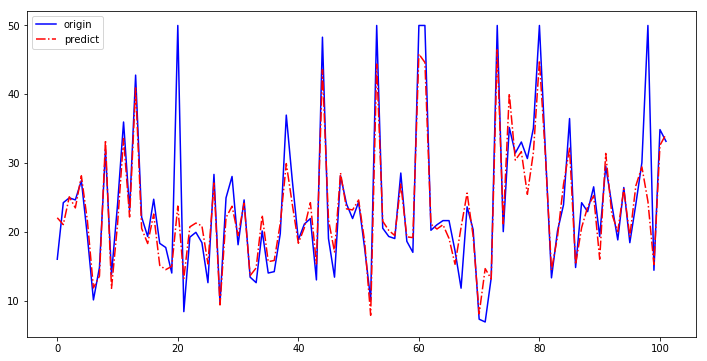

mean_absolute_error:  2.5910294117647057
mean_squared_error:  20.4502306372549
median_absolute_error:  1.6225000000000014
explained_variance_score:  0.8123600629453829
r2_score:  0.8075781253476251


In [20]:
"""randomforest"""
from sklearn import ensemble

clf = ensemble.RandomForestRegressor(n_estimators=20)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))


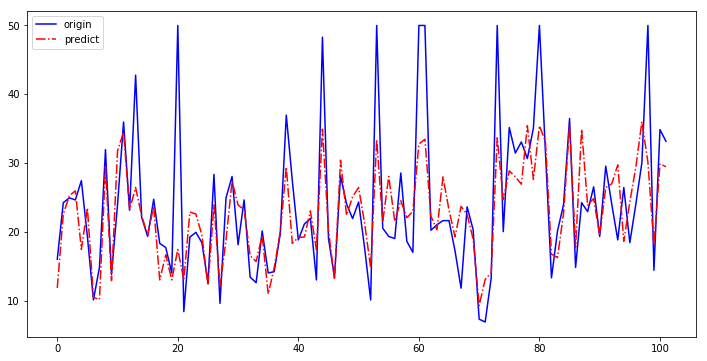

mean_absolute_error:  4.65
mean_squared_error:  48.47380784313725
median_absolute_error:  3.1099999999999994
explained_variance_score:  0.5547404043557895
r2_score:  0.5438965387645371


In [21]:
"""KNN"""
from sklearn import neighbors

clf = neighbors.KNeighborsRegressor()
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))


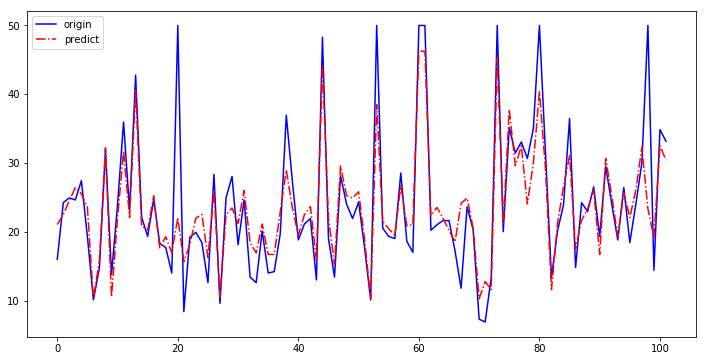

mean_absolute_error:  3.0982383139713168
mean_squared_error:  25.98836473979058
median_absolute_error:  2.1808888888888998
explained_variance_score:  0.7562313344814664
r2_score:  0.7554682902563368


In [22]:
"""AdaBoost"""
from sklearn import ensemble

clf = ensemble.AdaBoostRegressor(n_estimators=100)
clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)

fig = plt.figure(figsize=(12, 6))
plt.plot(range(Y_test.shape[0]), Y_test, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(range(Y_test.shape[0]), Y_predict, color='red', linewidth = 1.5, linestyle='-.')
plt.legend(['origin', 'predict'])
plt.show()


#evaluate
print('mean_absolute_error: ', mean_absolute_error(Y_test, Y_predict))
print('mean_squared_error: ', mean_squared_error(Y_test, Y_predict))
print('median_absolute_error: ', median_absolute_error(Y_test, Y_predict))
print('explained_variance_score: ', explained_variance_score(Y_test, Y_predict))
print('r2_score: ', r2_score(Y_test, Y_predict))
